In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

plt.style.use('seaborn-colorblind')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from acquire_walkthrough import get_iris_data
from prepare_walkthrough import prep_iris

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_iris_data()
encoder, train, test = prep_iris(df)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
30,0,4.8,3.1,1.6,0.2
36,0,5.5,3.5,1.3,0.2
29,0,4.7,3.2,1.6,0.2
55,1,5.7,2.8,4.5,1.3
118,2,7.7,2.6,6.9,2.3


## Exercise 2

Create a swarmplot using a melted dataframe of all your numeric variables. 

The x-axis is the variable name, the y-axis is the measure. 

Add another dimension using color to represent species. Document takeaways from this visualization.

In [3]:
train["id"] = train.index
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,id
30,0,4.8,3.1,1.6,0.2,30
36,0,5.5,3.5,1.3,0.2,36
29,0,4.7,3.2,1.6,0.2,29
55,1,5.7,2.8,4.5,1.3,55
118,2,7.7,2.6,6.9,2.3,118


## What is .melt?

Melt transforms "wide" data into "long" data.

Specifically, melt is converting all the columns other than "species" into a key => value set of columns. 

The "measurement" column is the key that holds the original column name. The "value" column holds that measurement.

A melted column is called "long", and that means that each row is a single observation (depending on how you label an 'observation').

An observation in our melted dataframe is single measurement of a single characteristic.

In [4]:
# pd.melt(dataframe, [columns_to_keep], var_name="new_name for the 'key' column")
# key was the name of the original column name
df_melt = pd.melt(train, ["species", "id"], var_name="measurement")

In [5]:
df_melt[df_melt.id == 30]

,species,id,measurement,value
0,0,30,sepal_length,4.8
112,0,30,sepal_width,3.1
224,0,30,petal_length,1.6
336,0,30,petal_width,0.2


In [6]:
df_melt.head()

,species,id,measurement,value
0,0,30,sepal_length,4.8
1,0,36,sepal_length,5.5
2,0,29,sepal_length,4.7
3,1,55,sepal_length,5.7
4,2,118,sepal_length,7.7


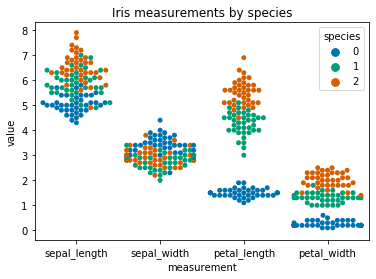

In [7]:
# By melting the dataframe, we get the key=>value column pair
# this gives us a single x and a single y 
# if you have an x column, and a y column => swarmplot 
plt.title("Iris measurements by species")
sns.swarmplot(x="measurement", y="value", data=df_melt, hue="species")

plt.show()

Takeaways:
- Looks like petal length and petal width are more clearly defined predictors of species rather than sepal information

## Exercise 3
Create 4 subplots (2 rows x 2 columns) of scatterplots

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- Make your figure size 14 x 8. What are your takeaways?

In [8]:
# Looks like we'll have to calculate sepal area to see if it's insightful
train["sepal_area"] = train.sepal_length * train.sepal_width
train["petal_area"] = train.petal_length * train.petal_width
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,id,sepal_area,petal_area
30,0,4.8,3.1,1.6,0.2,30,14.88,0.32
36,0,5.5,3.5,1.3,0.2,36,19.25,0.26
29,0,4.7,3.2,1.6,0.2,29,15.04,0.32
55,1,5.7,2.8,4.5,1.3,55,15.96,5.85
118,2,7.7,2.6,6.9,2.3,118,20.02,15.87


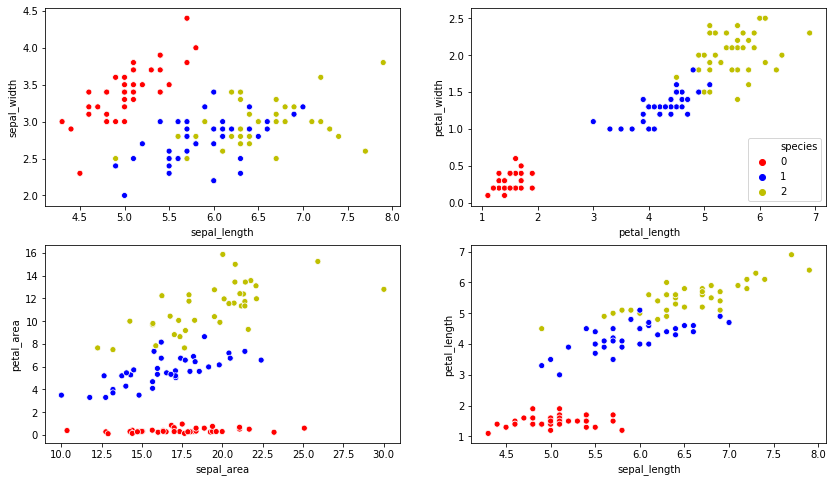

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
plt.style.use('seaborn-colorblind')

# First subplot
plt.subplot(2, 2, 1)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species", palette=["r", "b", "y"], legend=False)

# Second subplot
plt.subplot(2, 2, 2)
sns.scatterplot(x="petal_length", y="petal_width", data=train, hue="species", palette=["r", "b", "y"])
plt.legend(loc='lower right')

# Third subplot
plt.subplot(2, 2, 3)
sns.scatterplot(x="sepal_area", y="petal_area", data=train, hue="species", palette=["r", "b", "y"], legend=False)

# Forth subplot
plt.subplot(2, 2, 4)
sns.scatterplot(x="sepal_length", y="petal_length", data=train, hue="species", palette=["r", "b", "y"], legend=False)

plt.show()

## Exercise 4

- Create a heatmap of each variable layering correlation coefficient on top.
- We use heatmaps w/ linear correlation to find features that correlate well with the target variable
- W/ classification, our target is discrete b/c it's a class/category
- Our heatmap here is helping identify which input features correlate with eachother
- Why is that important: some/many classifcation algorithms mathematically assume independence of features
- For example, I would avoid petal_area, petal_length, and petal_width if I was doing a naive bayes model
- I'll probably use petal_area on its own rather than petal_length and petal_width together

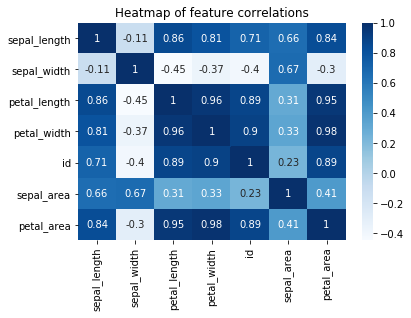

In [10]:
plt.title("Heatmap of feature correlations")
sns.heatmap(train.drop(columns="species").corr(), annot=True, cmap="Blues")
plt.show()

## Exercise 5

Create a scatter matrix visualizing the interaction of each variable

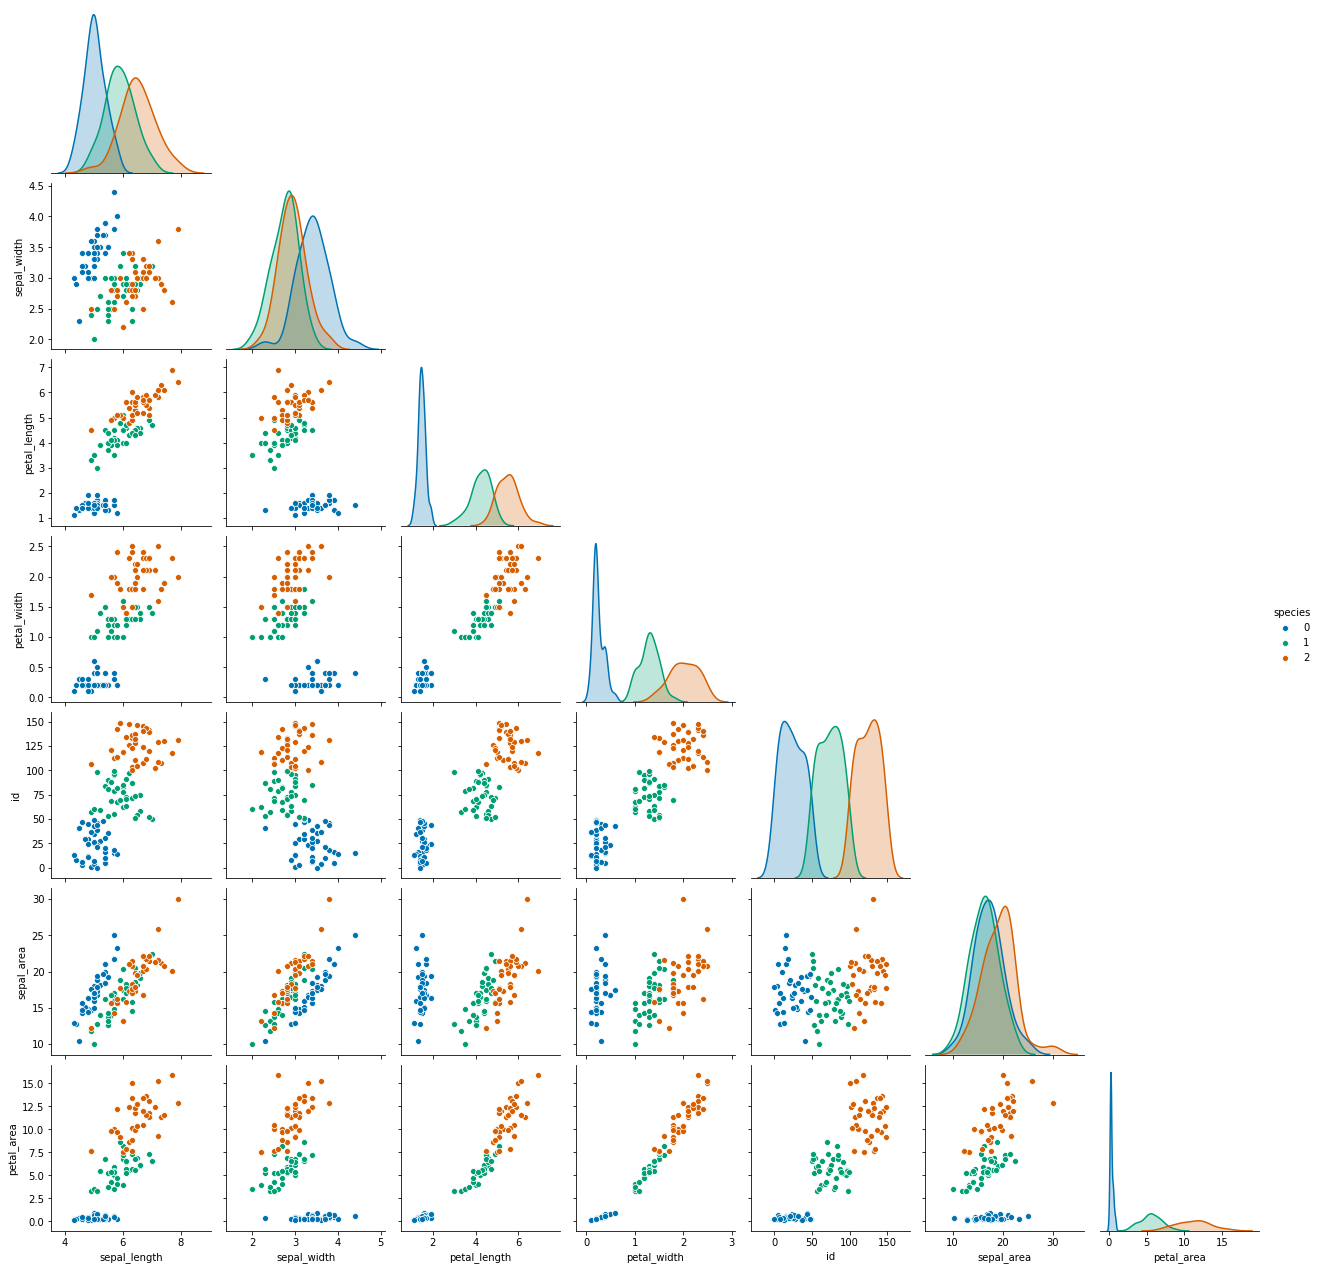

In [11]:
sns.pairplot(train, hue="species", corner=True)
plt.show()

## Exercise 6
- Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.
- Must include null hypothesis, alternative hypothesis, t-test, results, and summary
- $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
- $H_a$: the difference in sepal length between virginica and versicolor is substantial.
- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable sepal_length is a good choice to keep as a feature.
- We can use a t-test here, as sepal_length is somewhat normally distributed.

In [12]:
# Null hypothesis is that sepal length in virginica and versicolor are insignificantly different (close to the same)

In [13]:
# # We'll need to decode the species name
train["species_name"] = encoder.inverse_transform(train.species)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,id,sepal_area,petal_area,species_name
30,0,4.8,3.1,1.6,0.2,30,14.88,0.32,setosa
36,0,5.5,3.5,1.3,0.2,36,19.25,0.26,setosa
29,0,4.7,3.2,1.6,0.2,29,15.04,0.32,setosa
55,1,5.7,2.8,4.5,1.3,55,15.96,5.85,versicolor
118,2,7.7,2.6,6.9,2.3,118,20.02,15.87,virginica


In [14]:
virginica = train[train.species_name == "virginica"]
versicolor = train[train.species_name == "versicolor"]

# Let's go with an alpha of .01 for a 99% confidence level
alpha = .01

t, p = scipy.stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)

if p < alpha:
    print("We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.


In [15]:
virginica.sepal_length.describe()

count    37.000000
mean      6.518919
std       0.604997
min       4.900000
25%       6.200000
50%       6.400000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64

In [16]:
versicolor.sepal_length.describe()

count    37.000000
mean      5.902703
std       0.496927
min       4.900000
25%       5.600000
50%       5.900000
75%       6.200000
max       7.000000
Name: sepal_length, dtype: float64